In [1]:
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings('ignore')

In [2]:
# aux function to plot data
def plot_data(x, xx, sinexx, sine, poly):
    fig, ax = plt.subplots()
    ax.plot(xx, sinexx, label='sine curve')
    ax.plot(xx, np.polyval(poly, xx), label='fit')
    ax.scatter(x, sine, label='dataset')
    ax.legend()


def plot_error(train_X, train_Y, test_X, test_Y, min_degree=2, max_degree=15):
    res = []
    for i in range(min_degree, max_degree):
        poly = np.polyfit(train_X, train_Y, deg=i+1)
        polyval = np.polyval(poly, test_X)
        r = polyval-test_Y
        res.append(np.average(np.power(r,2)))
    index = np.linspace(min_degree,max_degree,max_degree-min_degree)

    plt.scatter(index, res)

    k = np.argmin(res) 
    print(k + min_degree -1 , res[k])


## Over and Under Fitting

When a model is too simple it is unable to achieve very low errors for the traininng set.

Setting a more complex model allows a more thigh fit with the training set, but it may imply poorer generalization.

This notebook explores both scenarios considering the scenario of polynomial fitting.

In this context, a simpler model is a polynomial with a low number of coefficients. Increasing the number of coefficients increases the complexity of the model.

### The Function

Consider a sine function with period $2$ between $0$ and $4\pi$

From this function we select 10 equally spaced points to create a training set.
 

In [3]:
data_point_count = 6

f = 2
x = np.linspace(0,2*np.pi*f,data_point_count)
xx = np.linspace(0,2*np.pi*f,200)

# dataset
sine = np.sin(x)

# the curve where these datapoints were taken from
sinexx = np.sin(xx)



Lets try a simple model, a cubic polynomial.

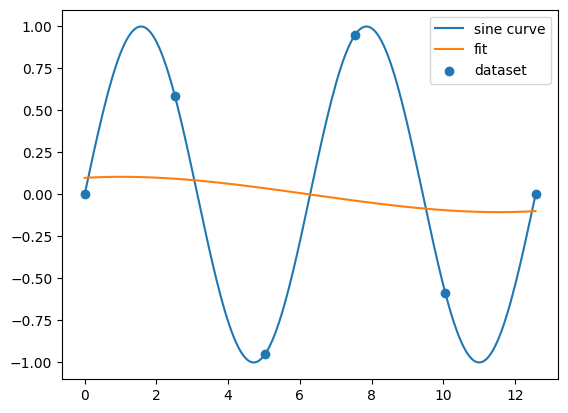

In [4]:
poly = np.polyfit(x, sine, deg=4)
plot_data(x, xx, sinexx, sine, poly)


The polynomial above is not sufficient to properly fit the data points.

Next, let's try more complex model, a polynomial of degree 10, and another of degree 20

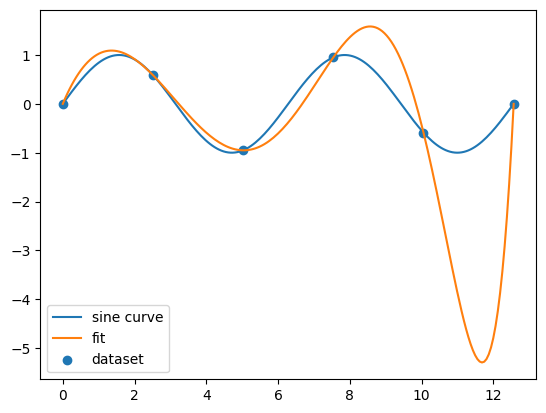

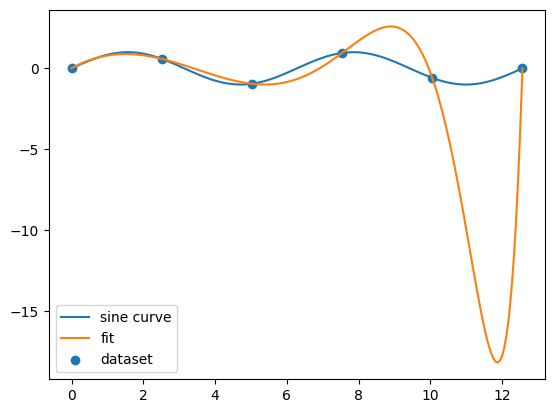

In [5]:
poly = np.polyfit(x, sine, deg=10)
plot_data(x, xx, sinexx, sine, poly)

poly = np.polyfit(x, sine, deg=20)
plot_data(x, xx, sinexx, sine, poly)


The above graphs show that, altough these higher degree polynomials provide a thigher fit to the training data, they are a poor approximation to the underlying function.

Below is plot the error for the training set obtained with these fittings for varying degree of the polynomial. The best degree is printed below, together with its associated error. In fact, apart from the very first entries we get a very low error on the training set.

9 2.5588069155717564e-28


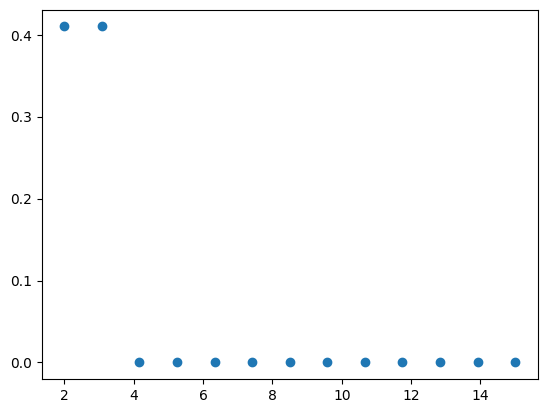

In [6]:
# Plotting the error for polynomials with degree from 1 to 25

plot_error(x, sine, x, sine)    

The next plot tells a very different story, it is the error when computed for $200$ points in the curve.

As can be seen from the graph, higher degree polynomials clearly have the potential of overfitting the full data, i.e., while providing a good fit for the training data, provide a poor approximation to the underlying function.

Note that we have assumed that the training points came from a sine function, and while it could be such function, it is not necessarily so. Any function passing throught those 6 points is a valid guess.

What we are truly assuming is that the underlying function is smooth, which is something that higher degree polynomials tend not to be as seen in the graphics for higher degree polynomials shown above.

3 0.3252042421994476


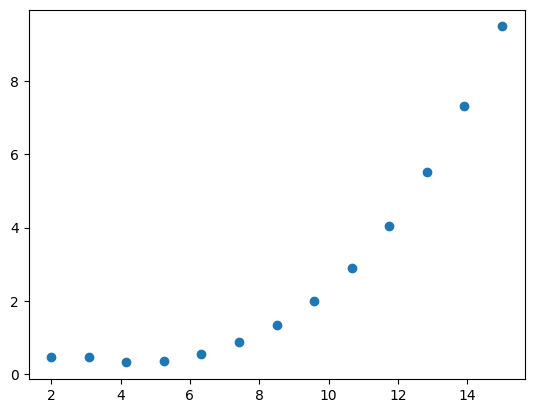

In [7]:
plot_error(x, sine, xx, sinexx)

So far we explored the complexity of the model and its impact on fitting the underlying curve. 

If more data can be collected this would be a preferable solution. Still if the polynomial has a higher degree than necessary it will start to display a non-smooth behavior.

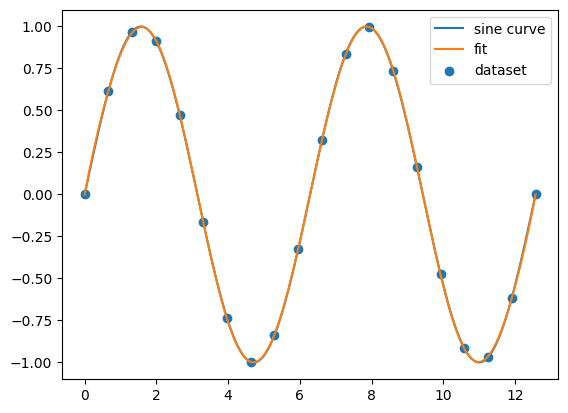

In [8]:
# get more data
new_data_point_count = 20

x2 = np.linspace(0,2*np.pi*f,new_data_point_count)
# dataset
sine2 = np.sin(x2)
# fit a polynomial of degree n to the training set
poly = np.polyfit(x2, sine2, deg=9)

#plot the training set, the sine curve and the fitted polynomial
plot_data(x2, xx, sinexx, sine2, poly)


As can be seen from the graphic above, a polynomial of degree 9 provides a good fit fit both to the training points as well as to the underlying function. However, with a degree of 60, while still providing a good approximation to the the underlying points, it is not a good fit for the underlying function.

This can be observed in the two following error plots, the first considering the error regarding the training points, and the second considering the error relative to the underlying function.

21 6.904476902072378e-25


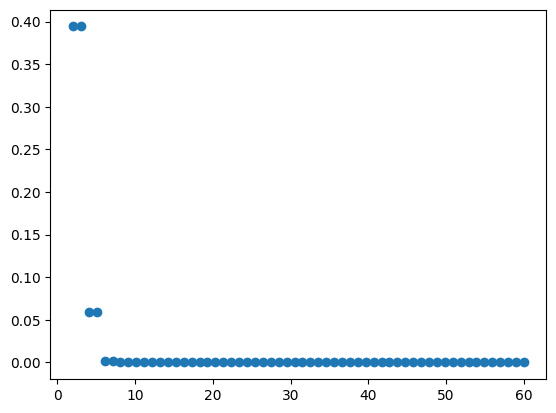

In [9]:
# error considering only the training points

plot_error(x2, sine2, x2, sine2, max_degree=60)  

22 7.39698578182115e-17


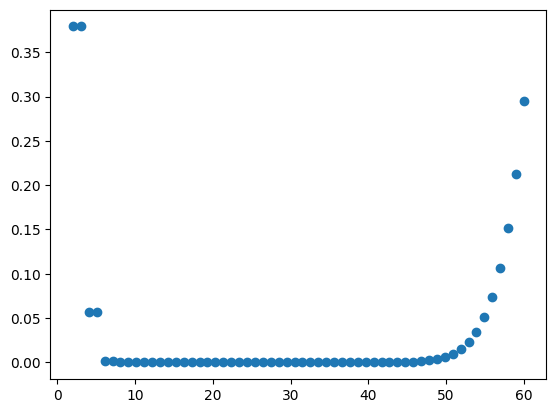

In [10]:
# error considering the underlying function

plot_error(x2, sine2, xx, sinexx, max_degree=60)